# The Inclined Plane

Our goal this week is to understand the motion of a downhill skier. Though the trajectory is pretty simple, we are still
interested in the basic questions; 

- how long does it take to get to the bottom of the hill?
- how fast are you going when you get there

The key idea of the week is to think outside the standard coordinate plane and instead adopt coordinates that are best suited to the physical problem.

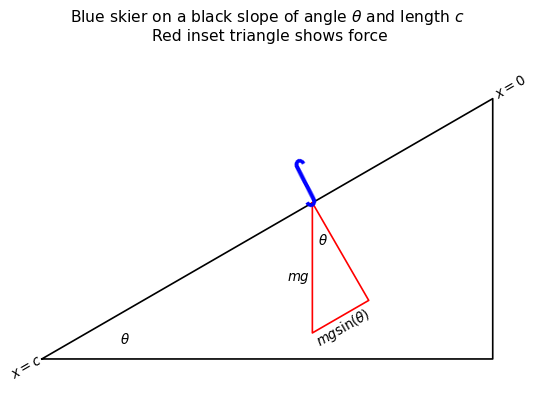

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6), dpi=80)

theta = np.pi/6
c = np.cos(theta)
s = np.sin(theta)
x = np.array([0, c, c, 0])
y = np.array([0, 0, s, 0])
plt.plot(x,y,'k') 
d = 0.25

dx = d*x 
dy = -d*y # flip and scale

ang = np.pi/2 - np.pi/6
ca = np.cos(ang)
sa = np.sin(ang)

rx = ca*dx + sa*dy + 0.6*c
ry = ca*dy - sa*dx + 0.6*s  # rotate and translate

plt.plot(rx,ry, 'r')

plt.text(.15,.03,'$\\theta$',fontsize=12)
plt.text(.53,.22,'$\\theta$',fontsize=12)
plt.text(.47,.15,'$mg$',fontsize=12)
plt.text(.52,.025,'$mg\sin(\\theta)$',fontsize=12,rotation=30)
plt.text(0.53*c,0.61*s,'$\int$',fontsize=32,rotation=30,color='b')
plt.text(c,s,'$x=0$',rotation=30,fontsize=12 )
plt.text(-0.075*c,-0.075*s,'$x=c$',rotation=30,fontsize=12 )
plt.title('Blue skier on a black slope of angle $\\theta$ and length $c$ \n Red inset triangle shows force', fontsize=14)
plt.axis('off')
plt.axis('equal');

This figure is meant to capture the essential parts of figure 4.13 of our physics book. Please understand the two key points.

- the direction of motion is down the hill, starting at $x=0$ at the top and $x=c$ at the bottom,
- the weight of the skier is mg (mass times gravity) but mg$\sin(\theta)$ is the force that acts in the direction of motion

With these obeservations we are really back to a one dimensional problem for $x$ as a function of time. Assumimng that we start at the top of the hill and push off with velocity $v_0$ we find that $x$ is simply

$$
  \boxed{x(t) = v_0t + (g/2)\sin(\theta)t^2}  \tag{x_ski}
$$

To determine how long it takes to hit the bottom we simply solve

$$
  c = x(t_{hit}) = v_0t_{hit} + (g/2)\sin(\theta)t^2_{thit}
$$

and arrive at

$$
  t_{hit} = \frac{-v_0 + \sqrt{v_0^2 + 2gc\sin(\theta)}}{g\sin(\theta)}
$$

We code this below for hills with angles that are multiples of $\pi/16$.
Do you see that the steeper the hill the faster to the bottom?

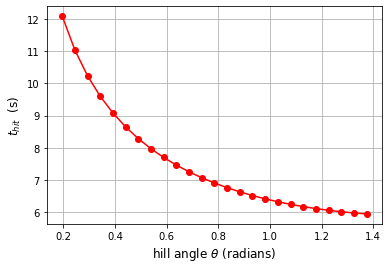

In [3]:
# find thit for many hill angles
v0 = 5  # m/s
g = 9.81  # m/s^2
c = 200  # m
theta = np.linspace(np.pi/16, 7*np.pi/16, 25)
thit = np.zeros(25)   # initialize the list of thits

for n in range(25):
    s = np.sin(theta[n])
    thit[n] = (-v0 + np.sqrt(v0**2 + 2*g*c*s))/(g*s)
    
plt.plot(theta, thit, 'ro-')
plt.xlabel('hill angle $\\theta$ (radians)', fontsize=12)
plt.ylabel('$t_{hit}$  (s)', fontsize=12)
plt.grid('on')

**Exercise 1.** Rather than setting $v_0=5$ and plotting $t_{hit}$ vs. $\theta$ please set $\theta=\pi/6$ and plot $t_{hit}$ for $v_0$ between 2 and 20.

In order to discern how fast our skier is moving, we need only "differentiate" the distance $x$ in (x_ski) to find

$$
  v(t) = v_0 + g\sin(\theta)t
$$

It follows that the skier's **terminal velocity** is

$$
  v_{hit} = v(t_{hit}) = v_0 + g\sin(\theta)t_{hit} = \sqrt{v_0^2 + 2gc\sin(\theta)}  \tag{v_ski_hit}
$$

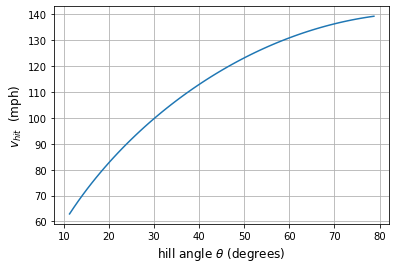

In [3]:
# find vhit for many hill angles
v0 = 5  # m/s
g = 9.81  # m/s^2
c = 200  # m
theta = np.linspace(np.pi/16, 7*np.pi/16, 70)
vhit = np.zeros(70)

for n in range(70):
    s = np.sin(theta[n])
    vhit[n] = np.sqrt(v0**2 + 2*g*c*s)
    
plt.plot(theta*180/np.pi, vhit*3600/1609)
plt.xlabel('hill angle $\\theta$ (degrees)', fontsize=12)
plt.ylabel('$v_{hit}$  (mph)', fontsize=12)
plt.grid('on')

Do you see that as the hill grows steeper the terminal velocity increases?

**Exercise 2.** Rather than setting $v_0=5$ and plotting $v_{hit}$ vs. $\theta$ please set $\theta=\pi/6$ and plot $v_{hit}$ for $v_0$ between 2 and 20.